Bike share sim 
Tracks bikes from Olin College and Wellesley college 
system has 12 bikes  and 2 bike racks with a capicity of 12 

In [1]:
try:
    import pint
except ImportError:
    !pip install pint


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [3]:
from modsim import *

In [4]:
bikeshare = State(olin = 10, wellesley = 2)

In [5]:
bikeshare

olin         10
wellesley     2
Name: state, dtype: int64

In [6]:
def bike_to_wellesley():
    print('Moving a bike to Wellesley')
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [7]:
bike_to_wellesley()

Moving a bike to Wellesley


In [8]:
show(bikeshare)

,state
olin,9
wellesley,3


In [9]:
def bike_to_olin():
    print('Moving a bike to Olin')
    bikeshare.olin += 1
    bikeshare.wellesley -= 1

In [10]:
bike_to_olin()

Moving a bike to Olin


In [11]:
print(bikeshare)

olin         10
wellesley     2
Name: state, dtype: int64


In [12]:
np.random.seed(17)

In [13]:
flip(.7)

True

In [14]:
if flip(.5):
    print('heads')
else:
    print('tails')


tails


In [15]:
if flip(0.5):
    bike_to_wellesley()

Moving a bike to Wellesley


In [16]:
if flip(0.33):
    bike_to_olin()

Moving a bike to Olin


In [17]:
def step():
    if flip(0.5):
        bike_to_wellesley()
    
    if flip(0.33):
        bike_to_olin()

In [18]:
step(0.5, 0.33)

TypeError: step() takes 0 positional arguments but 2 were given

In [ ]:
def step():
    if flip(0.5):
        bike_to_wellesley()
    
    if flip(0.33):
        bike_to_olin()

TypeError: step() takes 0 positional arguments but 2 were given

In [ ]:
p1 = .5
p2 = .33

def step(p1, p2):
    if flip(p1):
        bike_to_wellesley
    if flip(p2):
        bike_to_olin

In [ ]:
# p1

In [ ]:
step()

In [ ]:
for i in range(3):
    print(i)
    bike_to_wellesley()

0
Moving a bike to Wellesley
1
Moving a bike to Wellesley
2
Moving a bike to Wellesley


In [ ]:
bikeshare = State(olin=10, wellesley=2)

In [ ]:
results = TimeSeries()

In [ ]:
results[0] = bikeshare.olin

In [ ]:
for i in range(3):
    print(i)
    step()
    results[i+1] = bikeshare.olin

0
1
Moving a bike to Wellesley
2
Moving a bike to Olin


In [ ]:
show(results)

,Quantity
Time,
0,10
1,10
2,9
3,10


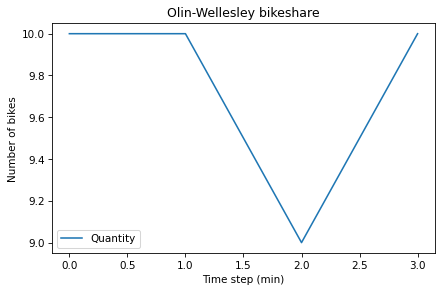

In [ ]:
results.plot()

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')